In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
%matplotlib inline

In [2]:
a = [(0.01171875, 0.04296875, 0.0, 28.432327270507812), (0.021484375, 0.083984375, 0.0, 26.646419525146484), (0.0859375, 0.09765625, 0.0, 24.857213973999023), (6.86328125, -8.58984375, 0.0, 6.020599842071533), (10.6875, -2.759765625, 0.0, 10.0), (10.634765625, -3.1171875, 0.0, 13.424226760864258), (10.00390625, -4.8671875, 0.0, 16.53212547302246), (3.708984375, -0.0, 0.0, 17.923917770385742), (3.744140625, -0.234375, 0.0, 16.81241226196289), (3.875, -0.2421875, 0.0, 16.627578735351562), (3.923828125, -0.123046875, 0.0, 18.512582778930664), (3.962890625, -0.248046875, 0.0, 16.627578735351562), (4.142578125, 0.12890625, 0.0, 17.558748245239258), (8.576171875, -4.951171875, 0.0, 12.304489135742188), (8.615234375, -4.974609375, 0.0, 13.617278099060059), (8.826171875, -4.68359375, 0.0, 14.149733543395996), (8.86328125, -4.703125, 0.0, 16.434526443481445), (8.728515625, -5.0390625, 0.0, 12.787535667419434), (1.5859375, -0.302734375, 0.0, 9.542425155639648), (3.884765625, -3.37890625, 0.0, 12.304489135742188), (3.609375, -3.732421875, 0.0, 13.424226760864258), (3.640625, -3.763671875, 0.0, 13.222192764282227), (4.015625, -3.4921875, 0.0, 12.552724838256836), (4.048828125, -3.521484375, 0.0, 12.552724838256836), (3.927734375, -3.71875, 0.0, 12.787535667419434), (3.9609375, -3.75, 0.0, 12.304489135742188), (4.1484375, -3.607421875, 0.0, 11.461280822753906), (7.857421875, 2.029296875, 0.0, 10.0), (7.830078125, 2.294921875, 0.0, 12.552724838256836), (7.87109375, 2.306640625, 0.0, 12.041199684143066), (0.083984375, 0.025390625, 0.0, 25.69373893737793), (0.125, 0.041015625, 0.0, 24.653827667236328), (10.32421875, -3.779296875, 0.0, 4.771212577819824), (10.365234375, 3.794921875, 0.0, 10.0), (8.650390625, -6.92578125, 0.0, 13.424226760864258), (11.103515625, -0.6953125, 0.0, 15.797836303710938), (8.05078125, -1.013671875, 0.0, 9.542425155639648)]
PC = np.array(a)
PC.shape

(37, 4)

In [3]:
PCXY = PC[:,(1,0,3)] #throw away Z axis

In [4]:
def filter(arr, factor=1):
    return arr[arr[:,2] > arr[:,2].mean()*factor] #keep only if reflectivity bigger than mean
    

def plot2DPC(arr_2d_pc):
    X, Y, reflectivity = [arr_2d_pc[:,i] for i in range(arr_2d_pc.shape[-1])]
    plt.figure(figsize=(20,10))
    axes = plt.gca()
    axes.set_xlim([-10,10])
    plt.scatter(X, Y, c=reflectivity, cmap='jet')
    plt.colorbar()
    plt.show()

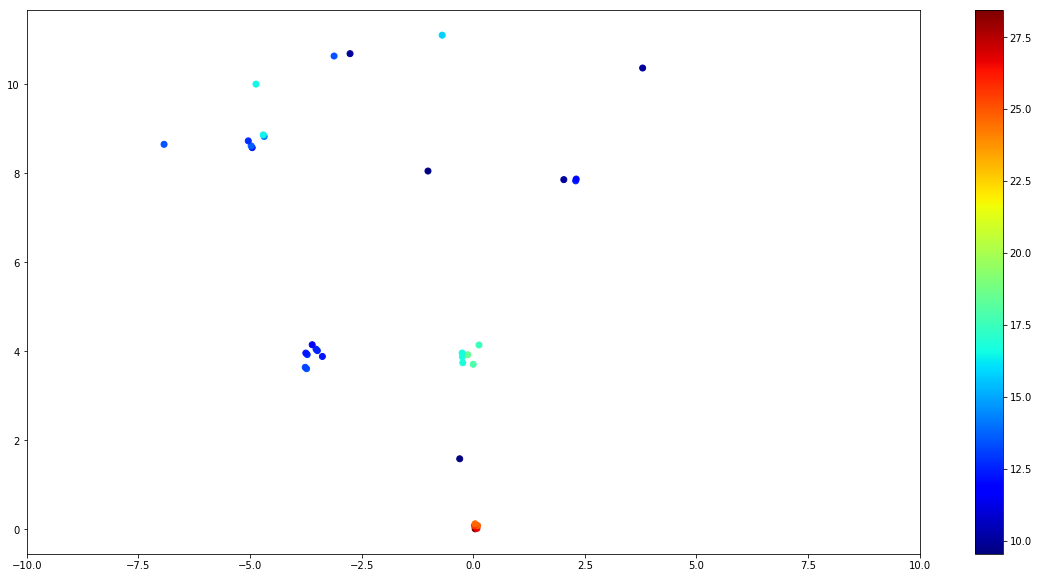

In [5]:
PCXY_filtered = filter(PCXY, factor=0.5)
plot2DPC(PCXY_filtered)

In [6]:
centroids, labels, _ = cluster.k_means(PCXY_filtered[:,0:2], 10)

In [7]:
labels

array([2, 2, 2, 1, 1, 5, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 6, 6, 6, 2, 2, 3, 9, 8, 7], dtype=int32)

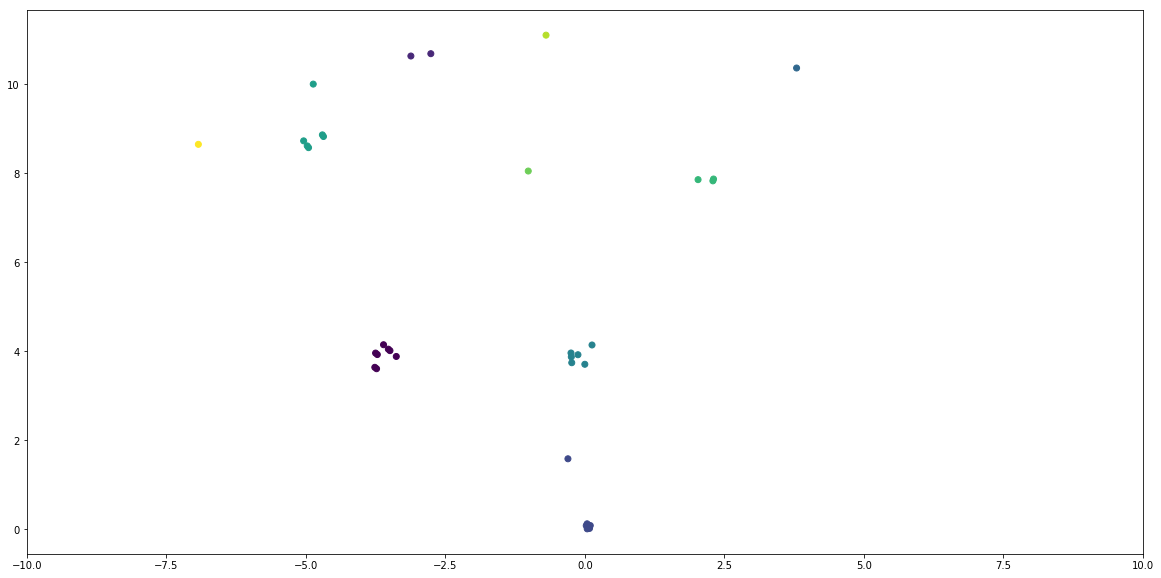

In [8]:
plt.figure(figsize=(20,10))
axes = plt.gca()
axes.set_xlim([-10,10])
plt.scatter(PCXY_filtered[:,0], PCXY_filtered[:,1], c=labels)

In [11]:
masses = np.bincount(labels, weights=PCXY_filtered[:,2])

In [ ]:
PCXY_filtered[]

In [31]:
mini_pcs = [PCXY_filtered[:,(0,2)][labels == l] for l in np.unique(labels)]

In [44]:
mini_pcs

[array([[-3.37890625, 12.30448914],
        [-3.73242188, 13.42422676],
        [-3.76367188, 13.22219276],
        [-3.4921875 , 12.55272484],
        [-3.52148438, 12.55272484],
        [-3.71875   , 12.78753567],
        [-3.75      , 12.30448914],
        [-3.60742188, 11.46128082]]), array([[-2.75976562, 10.        ],
        [-3.1171875 , 13.42422676]]), array([[ 4.29687500e-02,  2.84323273e+01],
        [ 8.39843750e-02,  2.66464195e+01],
        [ 9.76562500e-02,  2.48572140e+01],
        [-3.02734375e-01,  9.54242516e+00],
        [ 2.53906250e-02,  2.56937389e+01],
        [ 4.10156250e-02,  2.46538277e+01]]), array([[ 3.79492188, 10.        ]]), array([[-0.        , 17.92391777],
        [-0.234375  , 16.81241226],
        [-0.2421875 , 16.62757874],
        [-0.12304688, 18.51258278],
        [-0.24804688, 16.62757874],
        [ 0.12890625, 17.55874825]]), array([[-4.8671875 , 16.53212547],
        [-4.95117188, 12.30448914],
        [-4.97460938, 13.6172781 ],
        [-4

In [50]:
mini_pcs[0]

array([[-3.37890625, 12.30448914],
       [-3.73242188, 13.42422676],
       [-3.76367188, 13.22219276],
       [-3.4921875 , 12.55272484],
       [-3.52148438, 12.55272484],
       [-3.71875   , 12.78753567],
       [-3.75      , 12.30448914],
       [-3.60742188, 11.46128082]])

In [53]:
np.std(mini_pcs[0][:,1])

0.5671110261888119

In [55]:
sizes = [np.std(pc[:,1]) + np.std(pc[:,0]) for pc in mini_pcs]

In [56]:
{
    'no_clusters': -1,
    'centroids': centroids,
    'masses': masses,
    'sizes': sizes
    
    
}

{'no_clusters': -1, 'centroids': array([[-3.62060547e+00,  3.90454102e+00],
        [-2.93847656e+00,  1.06611328e+01],
        [-1.95312500e-03,  3.19010417e-01],
        [ 3.79492188e+00,  1.03652344e+01],
        [-1.19791667e-01,  3.89290365e+00],
        [-4.86979167e+00,  8.93554688e+00],
        [ 2.21028646e+00,  7.85286458e+00],
        [-1.01367188e+00,  8.05078125e+00],
        [-6.95312500e-01,  1.11035156e+01],
        [-6.92578125e+00,  8.65039062e+00]]), 'masses': array([100.60966396,  23.42422676, 139.82595253,  10.        ,
        104.06281853,  85.82568836,  34.59392452,   9.54242516,
         15.7978363 ,  13.42422676]), 'sizes': [0.7013936965377079,
  1.890824317932129,
  6.419083924156696,
  0.0,
  0.8556804906185466,
  1.7826767649599355,
  1.2308203759318397,
  0.0,
  0.0,
  0.0]}

In [ ]:
np.unique(labels)